### Part 1 : Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix, plot_roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')

### Part 2 : Reading the dataset

In [2]:
df=pd.read_csv("Airline_Passenger_Satisfaction.csv")
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


### <u>Preparing to build a model<u> 
* Multiple variables which are independent features to predict a dependent variable 
* Classify the data by replace method and drop columns which are not required 


In [21]:
df.rename(columns={"Customer Type":"Customer_Type"},inplace=True)
df.rename(columns={"Type of Travel":"Type_of_Travel"},inplace=True)

In [22]:
df.Satisfaction=df.Satisfaction.replace({"Neutral or Dissatisfied":0,"Satisfied":1})
df.Class=df.Class.replace({"Business":2,"Economy":1,'Economy Plus':0})
df.Customer_Type=df.Customer_Type.replace({'First-time':0,'Returning':1}) 
df.Type_of_Travel=df.Type_of_Travel.replace({"Business":0,"Personal":1})

In [23]:
def age(agevalue):
    if agevalue<40:
        return 1
    elif agevalue<60:
        return 2
    else:
        return 3

In [24]:
df['Age']=df['Age'].apply(age)

#### Data is classified and now columns which are not required are dropped 

### <u>Dataset Preparation<u> 

In [25]:
d=df.copy()

In [26]:
d.drop(['Gender',"ID"],axis=1,inplace=True)

In [27]:
d

,Age,Customer_Type,Type_of_Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,2,0,0,2,821,2,5.0,3,3,4,...,3,5,2,5,5,5,3,5,5,0
1,1,1,0,2,821,26,39.0,2,2,3,...,5,4,5,5,3,5,2,5,5,1
2,2,1,0,2,853,0,0.0,4,4,4,...,3,5,3,5,5,3,4,3,3,1
3,2,1,0,2,1905,0,0.0,2,2,3,...,5,5,5,4,4,5,2,5,5,1
4,2,1,0,2,3470,0,1.0,3,3,3,...,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,1,0,447,2,3.0,4,4,4,...,5,1,4,4,4,5,4,4,4,0
129876,2,1,1,0,308,0,0.0,5,3,5,...,5,2,5,2,2,4,3,2,5,0
129877,2,1,1,0,337,6,14.0,5,2,4,...,3,3,4,3,3,4,2,3,5,0
129878,2,1,1,0,337,31,22.0,4,4,3,...,4,4,5,3,3,4,5,3,5,1


#### Checking for the factors corelated with satisfaction 
* Statistics 
* Correlation 

In [28]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,1.600801,0.654171,1.0,1.0,2.0,2.0,3.0
Customer_Type,129880.0,0.816908,0.386743,0.0,1.0,1.0,1.0,1.0
Type_of_Travel,129880.0,0.309416,0.462255,0.0,0.0,0.0,1.0,1.0
Class,129880.0,1.406136,0.621378,0.0,1.0,1.0,2.0,2.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
Arrival Delay,129880.0,15.091129,38.407410,0.0,0.0,0.0,13.0,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0


In [29]:
cor = d.corr(method ='pearson')
cor = round(abs(cor.Satisfaction), 2)
cor.sort_values(ascending=False)

Satisfaction                              1.00
Online Boarding                           0.50
Type_of_Travel                            0.45
Class                                     0.45
In-flight Entertainment                   0.40
Seat Comfort                              0.35
On-board Service                          0.32
Leg Room Service                          0.31
Cleanliness                               0.31
Flight Distance                           0.30
In-flight Wifi Service                    0.28
Baggage Handling                          0.25
In-flight Service                         0.24
Check-in Service                          0.24
Food and Drink                            0.21
Customer_Type                             0.19
Ease of Online Booking                    0.17
Age                                       0.09
Arrival Delay                             0.06
Departure and Arrival Time Convenience    0.05
Departure Delay                           0.05
Gate Location

#### As expected gatelocation has no corelation with the satisfaction so we can avoid while creating model 

### Part 7: <u>Model Creation<u>

#### <u>Splitting the dataset:<u>
* test_size = 0.25 so that data is split into 75% and 25%
* random_state is applied so that each time we run we get the same result 

    
* Target is satisfaction of passengers.
* Features ( Customer Type, Age, Type of Travel, Class,
Seat comfort, Food and drink, In flight wifi service, In flight entertainment, Online support, Ease of Online booking,
On-board service, Leg room service, Baggage handling,
Check in service, Cleanliness, Online boarding).

In [30]:
x=d.drop(['Satisfaction',"Gate Location"],axis=1)
y=d['Satisfaction']


In [31]:
x

,Age,Customer_Type,Type_of_Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,2,0,0,2,821,2,5.0,3,3,4,3,3,5,2,5,5,5,3,5,5
1,1,1,0,2,821,26,39.0,2,2,3,5,5,4,5,5,3,5,2,5,5
2,2,1,0,2,853,0,0.0,4,4,4,5,3,5,3,5,5,3,4,3,3
3,2,1,0,2,1905,0,0.0,2,2,3,4,5,5,5,4,4,5,2,5,5
4,2,1,0,2,3470,0,1.0,3,3,3,5,3,4,4,5,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,1,0,447,2,3.0,4,4,4,4,5,1,4,4,4,5,4,4,4
129876,2,1,1,0,308,0,0.0,5,3,5,3,5,2,5,2,2,4,3,2,5
129877,2,1,1,0,337,6,14.0,5,2,4,2,3,3,4,3,3,4,2,3,5
129878,2,1,1,0,337,31,22.0,4,4,3,4,4,4,5,3,3,4,5,3,5


In [32]:
y

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129880, dtype: int64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)


In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(97410, 20)
(32470, 20)
(97410,)
(32470,)


#### Training the data with Some of the ML approaches:
* Logistic Regression
* KNN
* Random Forest Classifier
* Decision Tree Classifier
* Naive Bayes Classifier
* AdaBoost Classifier
    

####  ML approach Functions
* Model fitting
* Predicting using test 
* Accuracy score
* ROC curve
* AUC score
* confusion matrix
* Classification_matrix
* time taken by each model


In [35]:
def model_create(model, x_train, y_train, x_test, y_test):
    intial_time=time.time()
    model.fit(x_train,y_train.ravel())
        
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy = {}".format(accuracy))
    
    roc_auc = roc_auc_score(y_test, y_pred) 
    print("ROC-Area under Curve = {}".format(roc_auc))
    
    time_taken = time.time()-intial_time
    print("Time taken = {}".format(time_taken))
    
    print(classification_report(y_test,y_pred,digits=5))
    
    plot_confusion_matrix(model, x_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    
    plot_roc_curve(model, x_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

### <u>Logistic Regression :<u>
* Logistic regression models a relationship between predictor variables and a categorical response variable. Here, we could use logistic regression to model the relationship between various features of purchasing to predict if a person have lung cancer or not (a binary variable: either yes or no). Logistic regression helps us estimate a probability of falling into a certain level of the categorical response given a set of predictors.

Accuracy = 0.8016630736064059
ROC-Area under Curve = 0.7998567191597264
Time taken = 1.2114152908325195
              precision    recall  f1-score   support

           0    0.83412   0.81298   0.82342     18469
           1    0.76128   0.78673   0.77380     14001

    accuracy                        0.80166     32470
   macro avg    0.79770   0.79986   0.79861     32470
weighted avg    0.80271   0.80166   0.80202     32470



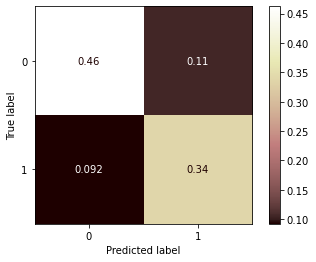

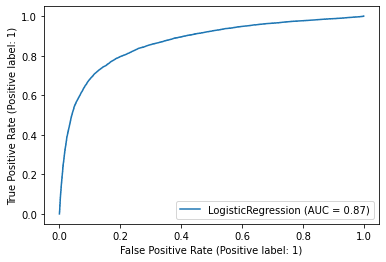

In [36]:
model_LR=LogisticRegression()
model_LR, accuracy_LR, roc_auc_LR, time_LR= model_create(model_LR, x_train, y_train, x_test, y_test)

#### <u>Decision Tree:<u>
* Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

Accuracy = 0.9425007699414845
ROC-Area under Curve = 0.9416199605553263
Time taken = 0.6069984436035156
              precision    recall  f1-score   support

           0    0.95075   0.94802   0.94938     18469
           1    0.93169   0.93522   0.93345     14001

    accuracy                        0.94250     32470
   macro avg    0.94122   0.94162   0.94142     32470
weighted avg    0.94253   0.94250   0.94251     32470



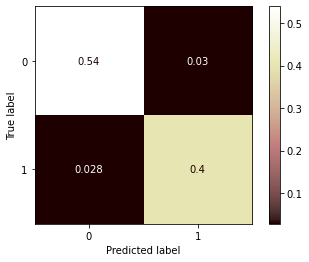

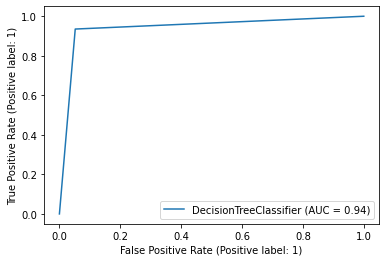

In [37]:
model_DC=DecisionTreeClassifier()
model_DC, accuracy_DC, roc_auc_DC, time_DC= model_create(model_DC, x_train, y_train, x_test, y_test)

### <u>Random Forest:<u>
* Random forests is a supervised learning algorithm. It can be used both for classification and regression. 
* It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance. 

Accuracy = 0.9618109023714198
ROC-Area under Curve = 0.9589917598647427
Time taken = 13.591074228286743
              precision    recall  f1-score   support

           0    0.95457   0.97948   0.96686     18469
           1    0.97197   0.93850   0.95494     14001

    accuracy                        0.96181     32470
   macro avg    0.96327   0.95899   0.96090     32470
weighted avg    0.96207   0.96181   0.96172     32470



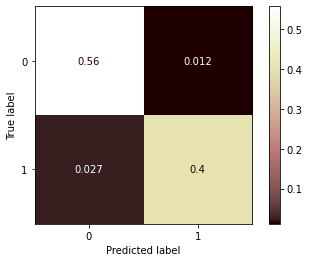

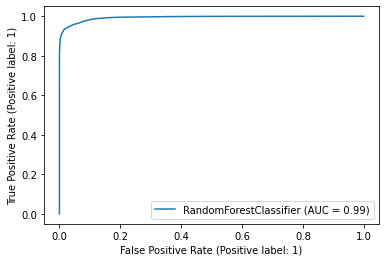

In [38]:
model_RF=RandomForestClassifier()
model_RF, accuracy_RF, roc_auc_RF, time_RF= model_create(model_RF, x_train, y_train, x_test, y_test)

### <u>Naive Bayes Classifier:<u>
* Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

Accuracy = 0.8665537419156144
ROC-Area under Curve = 0.8606822805742443
Time taken = 0.13199996948242188
              precision    recall  f1-score   support

           0    0.86751   0.90335   0.88507     18469
           1    0.86516   0.81801   0.84093     14001

    accuracy                        0.86655     32470
   macro avg    0.86634   0.86068   0.86300     32470
weighted avg    0.86650   0.86655   0.86604     32470



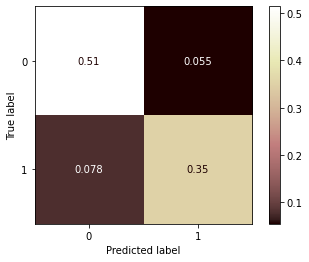

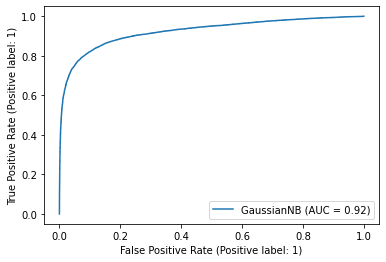

In [39]:
model_NB=GaussianNB()
model_NB, accuracy_NB, roc_auc_NB, time_NB= model_create(model_NB, x_train, y_train, x_test, y_test)

#### <u>K-Nearest Neighbors<u>
* The K-Nearest Neighbors or KNN Classification is a simple and easy to implement, supervised machine learning algorithm that is used mostly for classification problems but applicable for regression problems too.

Accuracy = 0.7860178626424392
ROC-Area under Curve = 0.774941912694687
Time taken = 86.05439567565918
              precision    recall  f1-score   support

           0    0.78692   0.85543   0.81975     18469
           1    0.78456   0.69445   0.73676     14001

    accuracy                        0.78602     32470
   macro avg    0.78574   0.77494   0.77825     32470
weighted avg    0.78590   0.78602   0.78396     32470



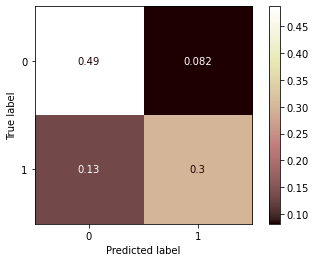

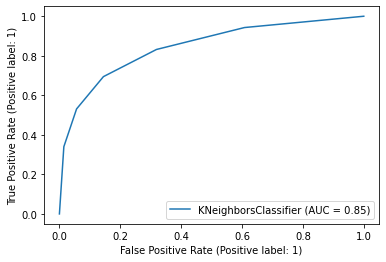

In [40]:
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN, accuracy_KNN, roc_auc_KNN, time_KNN= model_create(model_KNN, x_train, y_train, x_test, y_test)

### AdaBoostClassifier
        - An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Accuracy = 0.9276562981213428
ROC-Area under Curve = 0.9251671665555443
Time taken = 3.559924364089966
              precision    recall  f1-score   support

           0    0.93051   0.94326   0.93684     18469
           1    0.92377   0.90708   0.91535     14001

    accuracy                        0.92766     32470
   macro avg    0.92714   0.92517   0.92609     32470
weighted avg    0.92760   0.92766   0.92757     32470



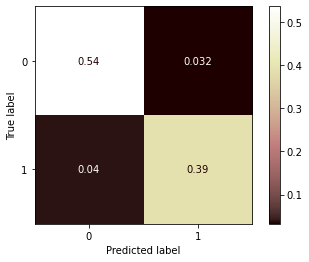

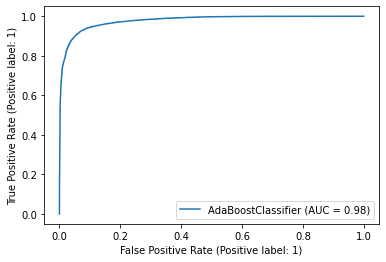

In [41]:
model_AB=AdaBoostClassifier(n_estimators=50,learning_rate=1)
model_AB, accuracy_AB, roc_auc_AB, time_AB= model_create(model_AB, x_train, y_train, x_test, y_test)

#### Model Comparison
* Compare the performances of the above discussed models with respect to their ROC_AUC score and total time taken for execution.

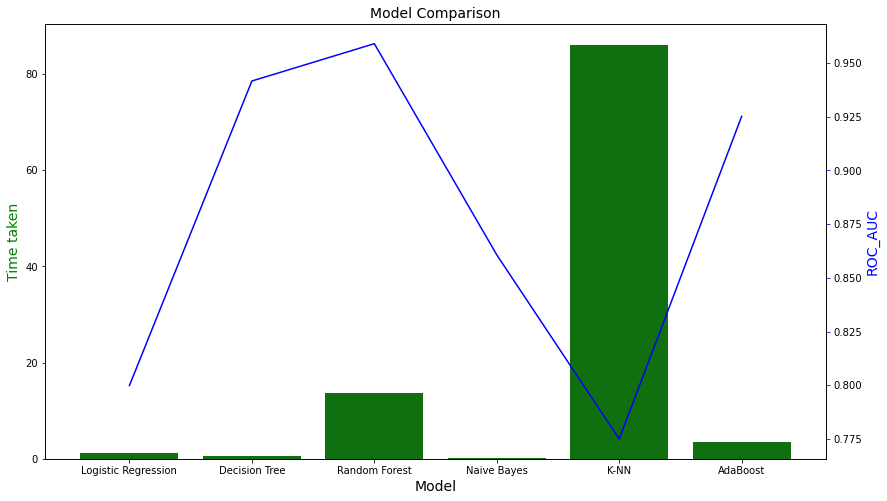

In [42]:
roc_auc_scores = [roc_auc_LR, roc_auc_DC, roc_auc_RF, roc_auc_NB, roc_auc_KNN, roc_auc_AB]
tt   =           [time_LR, time_DC, time_RF,  time_NB, time_KNN,time_AB]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','K-NN','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison', fontsize=14)
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color='green')

ax2 = sns.barplot(x='Model', y='Time taken', data = data, color="green")
ax1.tick_params(axis='y')
ax2 = ax1.twinx()

ax2.set_ylabel('ROC_AUC', fontsize=14, color="blue")
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color="blue")
ax2.tick_params(axis='y', color="blue")

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy Percentage</th>
      <th>ROC-AUC</th>
      <th>Timetaken</th>
  
  </tr>
  <tr>
    <td><u>Logistic Regression<u></td>
    <td>80%</td>
    <td>0.79</td>
    <td>1.13</td>
  </tr>
        </tr>
  <tr>
    <td><u>Decision Tree Classifier<u></td>
    <td>94%</td>
    <td>0.94</td>
    <td>0.52</td>
  </tr>
        </tr>
  <tr>
    <td><u>Random Forest<u></td>
    <td>96%</td>
    <td>0.95</td>
    <td>8.95</td>>
  </tr>
        <tr>
    <td><u>Naive Bayes<u></td>
        <td>86%</td>
        <td>0.86</td>
        <td>0.09</td>
  </tr>
         <tr>
    <td><u>KNN<u></td>
    <td>78%</td>
    <td>0.77</td>
    <td>12O.32</td>
  </tr>
        <tr>
    <td><u>ADA Boost<u></td>
    <td>92%</td>
    <td>0.92</td>
    <td>4.18</td>
  </tr>

### Conclusion:
* ROC-AUH curve is maximumum for **Random Forest** and minimum for **KNN** 
* Time taken is maximum for **KNN** and minimum for **Naive Bayes**
##### For a best model  prediction 
* Maximum ROC_AUC curve
* Minimum time is required 
#### Comparing **Random Forest** is the best from among the models trained to predict the accurate result with an **accuracy** of **96%** and **time taken** to execute is **8.95**